# Predict Home Prices using Regression Techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #this would remove any deprecated warning

## Load Train and Test Data

In [2]:
#Import the train & test data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
print("Train Data: " + str(df_train.shape))
print("Test Data: " + str(df_test.shape))

Train Data: (1460, 81)
Test Data: (1459, 80)


## Analyze Data

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Analyze SalePrice

In [8]:
#Lets look at sale price
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Does Sale Price Look Like a Normal Distribtion Curve?

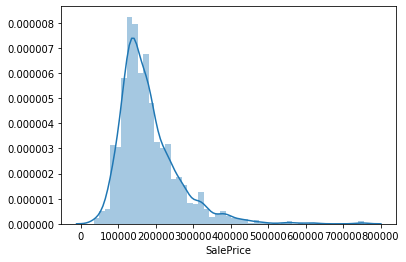

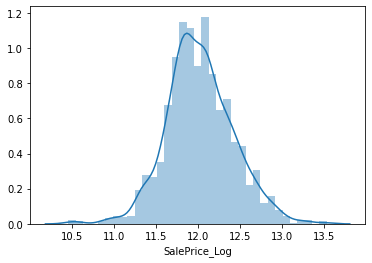

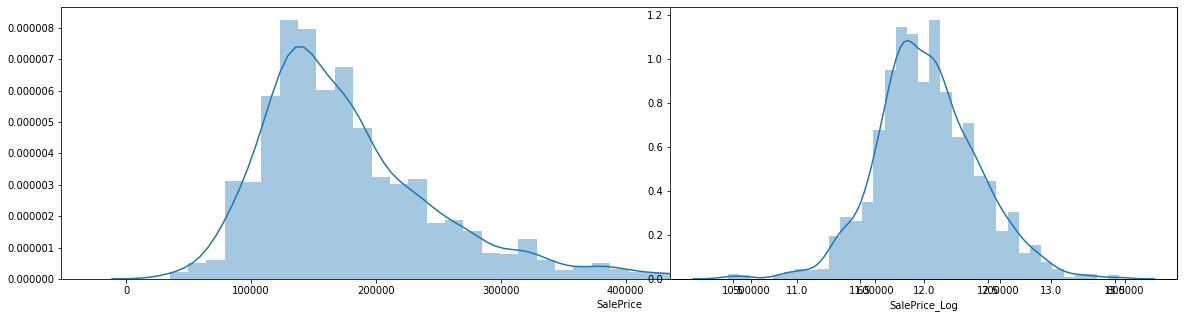

In [9]:
#Look at sale price in a distrbution graph
sns.distplot(df_train['SalePrice'])
plt.show()

#Calculated the Log of SalePrice and store it in DF
df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice_Log'])
plt.show()

#Charting them side by side
fig = plt.figure(figsize=[20,5])
ax1 = fig.add_subplot(1, 1, 1)
sns.distplot(df_train['SalePrice'], ax=ax1)

ax2 = fig.add_subplot(1, 2, 2)
sns.distplot(df_train['SalePrice_Log'], ax=ax2)
plt.show()


#QUESTION: Do you need to apply np.log to every numerical variable?

### Another way to see if SalePrice is Normal
* Use Historgram
* Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

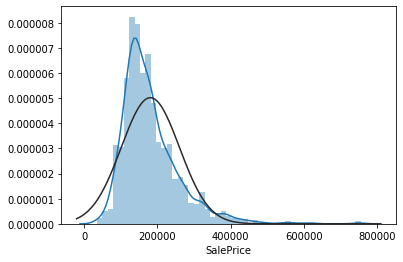

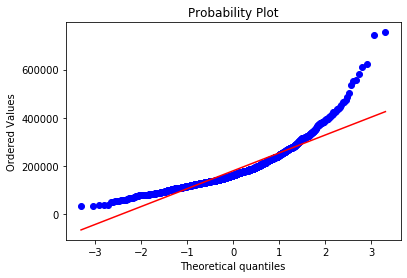

In [10]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Based on the above 2 charts, SalePrice is not normal. The peakness and skewness do not follow the diagonal line.

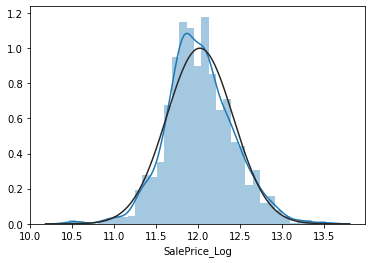

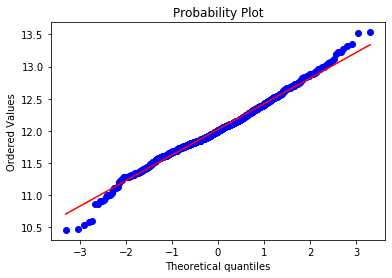

In [11]:
sns.distplot(df_train['SalePrice_Log'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice_Log'], plot=plt)

### Another Way to Check Skewness and Kurtosis of SalePrice & SalePrice_Log

In [12]:
#Check to see if the SalePrice deviates from a normal distribution
#Skew - how much does it skew away from a normal distribution
#Kurtosis - how much more peak/taller it is from a normal distribution

s = df_train['SalePrice'].skew()
print("Non-Log Skewness: " + str(s))
k = df_train['SalePrice'].kurt()
print("Non-Log Kurtosis: " + str(k))
print("*" * 50)

print("Log Skewness: %f" % df_train['SalePrice_Log'].skew())
print("Log Kurtosis: %f" % df_train['SalePrice_Log'].kurt())

#QUESTION: What’s the purpose of testing skewness and kurtosis?

Non-Log Skewness: 1.8828757597682129
Non-Log Kurtosis: 6.536281860064529
**************************************************
Log Skewness: 0.121335
Log Kurtosis: 0.809532


## What's the Relationship Between Log of SalePrice and some Numerical Variables

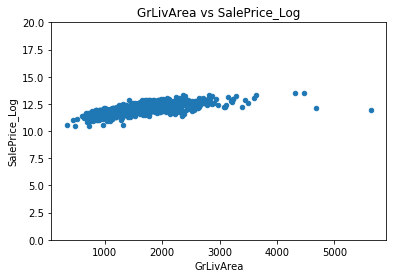

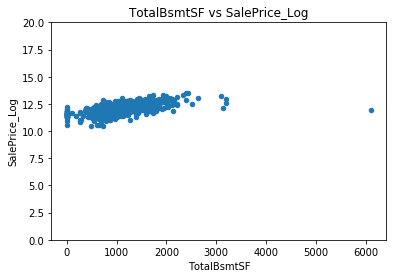

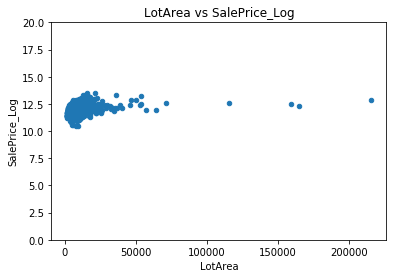

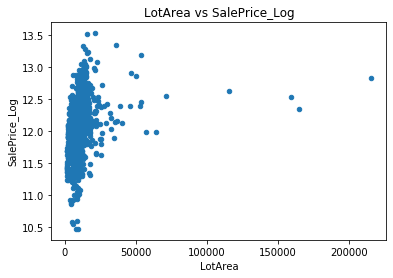

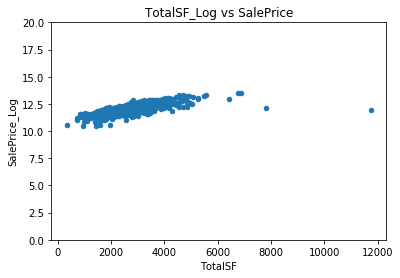

In [13]:
#GrLivArea, talBsmtSF have no missing values
#Select only GrLivArea & SalePrice and draw a scatter plot
df_train[['SalePrice_Log', 'GrLivArea']].plot.scatter(x='GrLivArea', y='SalePrice_Log', ylim=(0, 20), title='GrLivArea vs SalePrice_Log')

#Select only TotalBsmtSF & SalePrice and draw a scatter plot
df_train[['SalePrice_Log', 'TotalBsmtSF']].plot.scatter(x='TotalBsmtSF', y='SalePrice_Log', ylim=(0, 20), title='TotalBsmtSF vs SalePrice_Log')

#Select only LotArea & SalePrice and draw a scatter plot
df_train[['SalePrice_Log', 'LotArea']].plot.scatter(x='LotArea', y='SalePrice_Log', ylim=(0, 20), title='LotArea vs SalePrice_Log')

#QUESTION: Another syntax to plot. DIFF FROM ABOVE
df_train.plot(kind='scatter', x='LotArea', y='SalePrice_Log')
plt.title('LotArea vs SalePrice_Log')


#Get Total Square Footage then plot against SalePrice
df_train['TotalSF'] = df_train['GrLivArea'] + df_train['TotalBsmtSF']
df_train[['SalePrice_Log', 'TotalSF']].plot.scatter(x='TotalSF', y='SalePrice_Log', ylim=(0, 20), title='TotalSF_Log vs SalePrice')

plt.show()

# Like the training data, create TotalSF feature in the test data
df_test['TotalSF'] = df_test['GrLivArea'] + df_test['TotalBsmtSF']

### Conclusion
- GrLivArea & TotalBsmtSF seems to have a linear correlation to SalePrice
- Lot Area does not seem to have a liner correlation to SalePrice

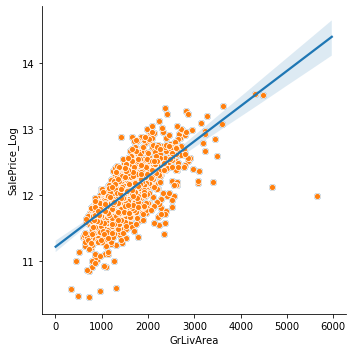

In [14]:
#Use seaborn to plot the same charts above. 
#QUESTION: Which is better?
#QUESTION: Why scatterplot doesn't work in seaborn - https://seaborn.pydata.org/generated/seaborn.scatterplot.html

#Used SalePrice and not SalePrice_Log
sns.lmplot(x='GrLivArea', y='SalePrice_Log', data=df_train)
sns.scatterplot(x='GrLivArea', y='SalePrice_Log', data=df_train)
plt.show()

### Using Subplots to Display the Charts

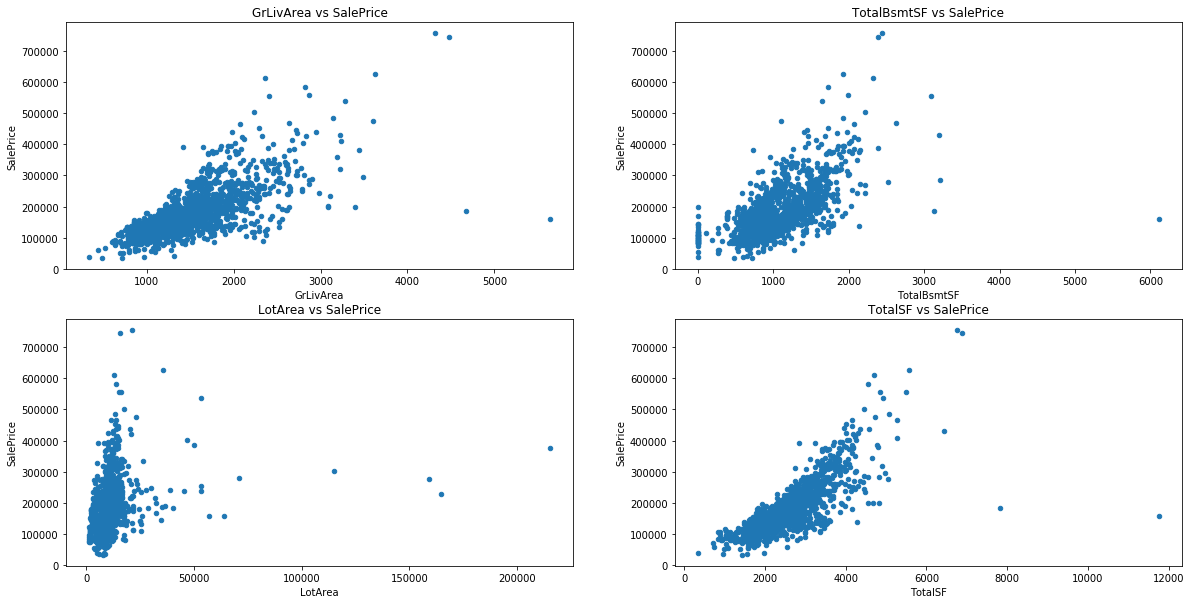

In [15]:
area = df_train[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'LotArea', 'TotalSF']]

#Set the size of the entire plot
fig = plt.figure(figsize=[20,10])

#What to plot in each subplot
#QUESTION - How to read this (2, 2, 1) - 2 rows, 2 columns, box 1
ax1 = fig.add_subplot(2, 2, 1)
area.plot.scatter(x='GrLivArea', y='SalePrice', ax=ax1, title='GrLivArea vs SalePrice')

ax2 = fig.add_subplot(2, 2, 2)
area.plot.scatter(x='TotalBsmtSF', y='SalePrice', ax=ax2, title='TotalBsmtSF vs SalePrice')

ax3 = fig.add_subplot(2, 2, 3)
area.plot.scatter(x='LotArea', y='SalePrice', ax=ax3, title='LotArea vs SalePrice')

ax4 = fig.add_subplot(2, 2, 4)
area.plot.scatter(x='TotalSF', y='SalePrice', ax=ax4, title='TotalSF vs SalePrice')

plt.show()

### Use Correlation Matrix to Easily Find Out the Relationship Between All The Numerical Variables

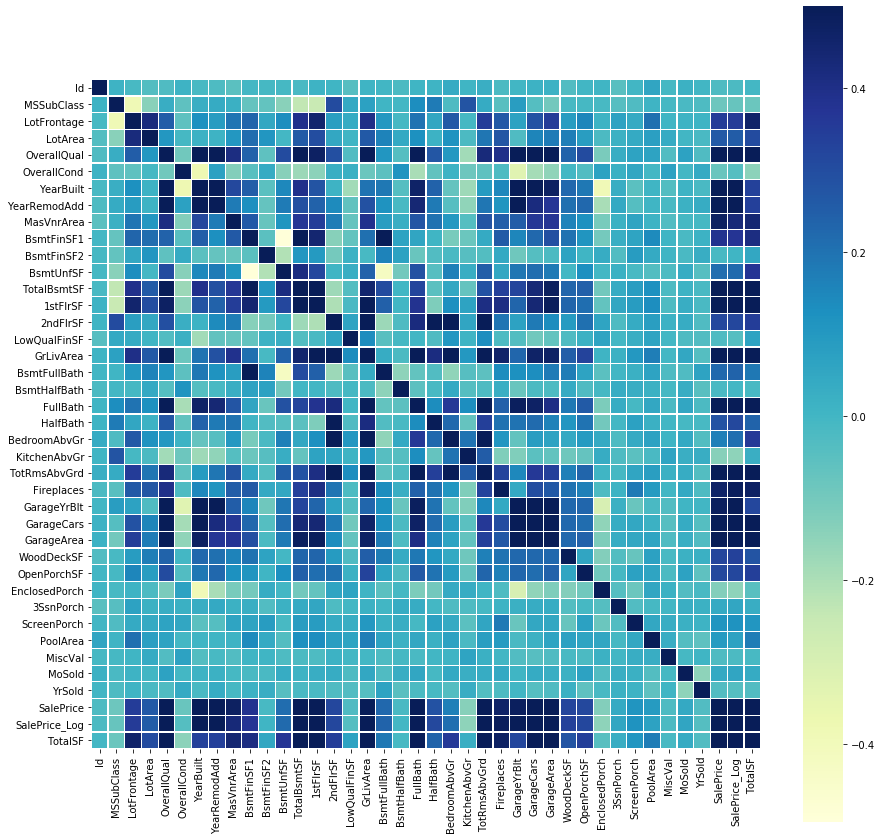

In [16]:
corr_matrix = df_train.corr()
plt.figure(figsize=(15,15)) #this sets the size of the heatmap
sns.heatmap(corr_matrix, linewidths=0.2, square=True, vmax = 0.5, cmap="YlGnBu")
plt.show()

In [17]:
#Method 1 to get the top 10 correlated variables that are related to SalePrice, not counting SalePrice
k = 11
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'SalePrice_Log', 'OverallQual', 'TotalSF', 'GrLivArea',
       'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
       'TotRmsAbvGrd'],
      dtype='object')

In [18]:
#Method 2 to get the top 10 correlated variables that are related to SalePrice, not including SalePrice
corr_to_saleprice = df_train[df_train.columns[1:]].corr()['SalePrice']
corr_to_saleprice = corr_to_saleprice.sort_values(ascending=False).iloc[:11] #get the top 10 correlated variables not counting SalePrice
corr_to_saleprice.index

#Question: Method 1 vs Method 2, which is better?

Index(['SalePrice', 'SalePrice_Log', 'OverallQual', 'TotalSF', 'GrLivArea',
       'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
       'TotRmsAbvGrd'],
      dtype='object')

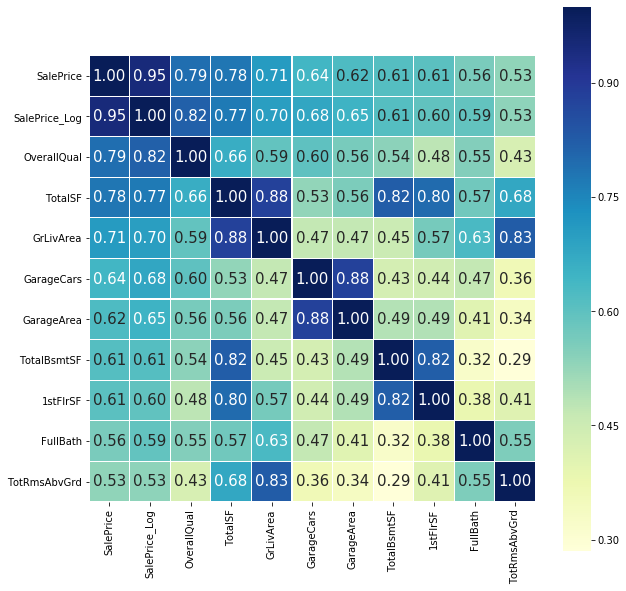

In [19]:
#Corrcoef - https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
#In order to use corrcoef, each row needs to be a variable and each column is a single observation. Hence we need to transpose the data set.

top10_corr_matrix = np.corrcoef(df_train[cols].values.transpose()) #df_train[cols].values.transpose() moves the variable names to each row instead of column
plt.figure(figsize=(10,10)) #this sets the size of the heatmap

#fmt = decimal places
# annot_kws={'size': 10} - controls the size of font each square
sns.heatmap(top10_corr_matrix, linewidths=0.2, square=True, cmap="YlGnBu", cbar=True, annot=True, yticklabels=cols.values, xticklabels=cols.values, fmt='.2f', annot_kws={'size': 15})
plt.show()

### Conclusion: What are the highly correlated Numerical variables to SalePrice
* GarageCars and GarageArea are similar. Hence, we'll only include GarageCars since it has a higher correlation score to Saleprice
* The final list of highly correlated variables are - 'OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'

## Visualizing The Above Matrix in Charts

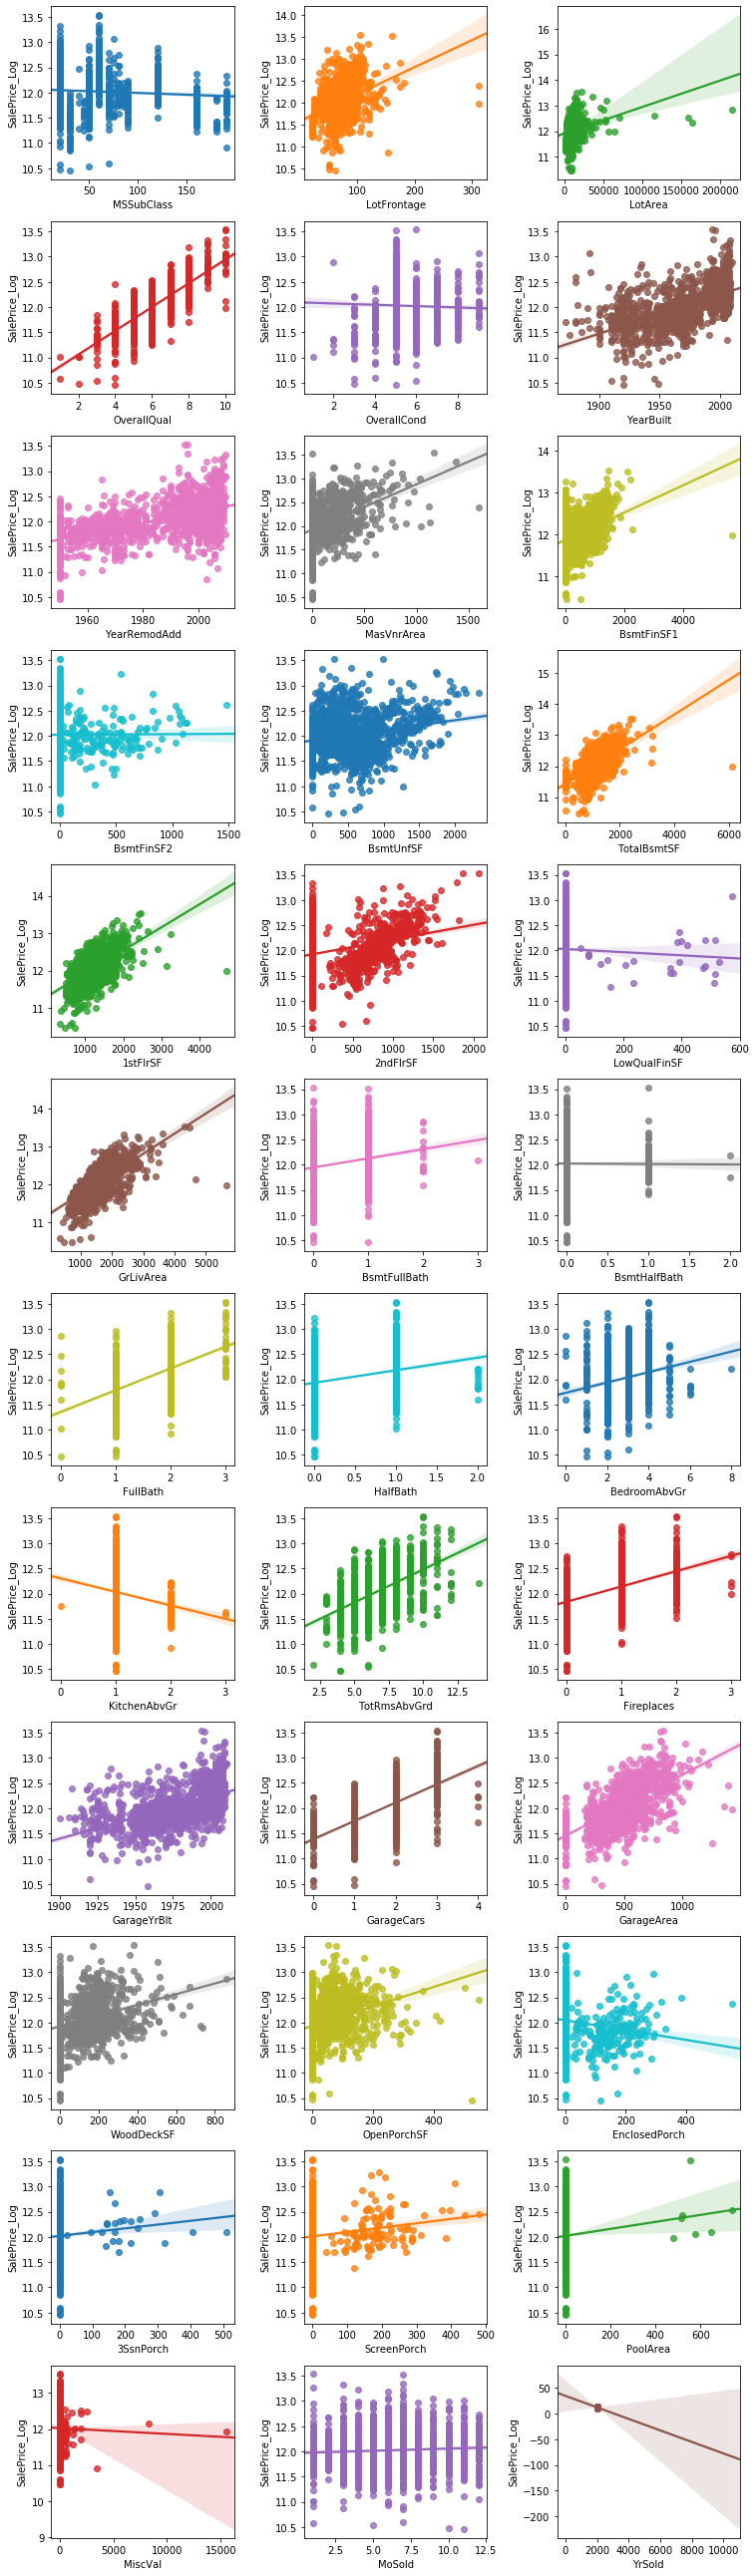

In [30]:
nr_rows = 12
nr_cols = 3
numerical_variables = df_train.select_dtypes(include=[np.number]).columns

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_variables)
li_not_plot = ['Id', 'SalePrice', 'SalePrice_Log']
li_plot_num_feats = [c for c in list(numerical_variables) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
             sns.regplot(df_train[li_plot_num_feats[i]], df_train['SalePrice_Log'], ax = axs[r][c])
#            stp = stats.pearsonr(df_train[li_plot_num_feats[i]], df_train['SalePrice_Log'])
#            axs[r][c].text(0.4,0.9,"title",fontsize=7)
#            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
#            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

## Seaborn PairPlot - Another Way to Visualize Correlation

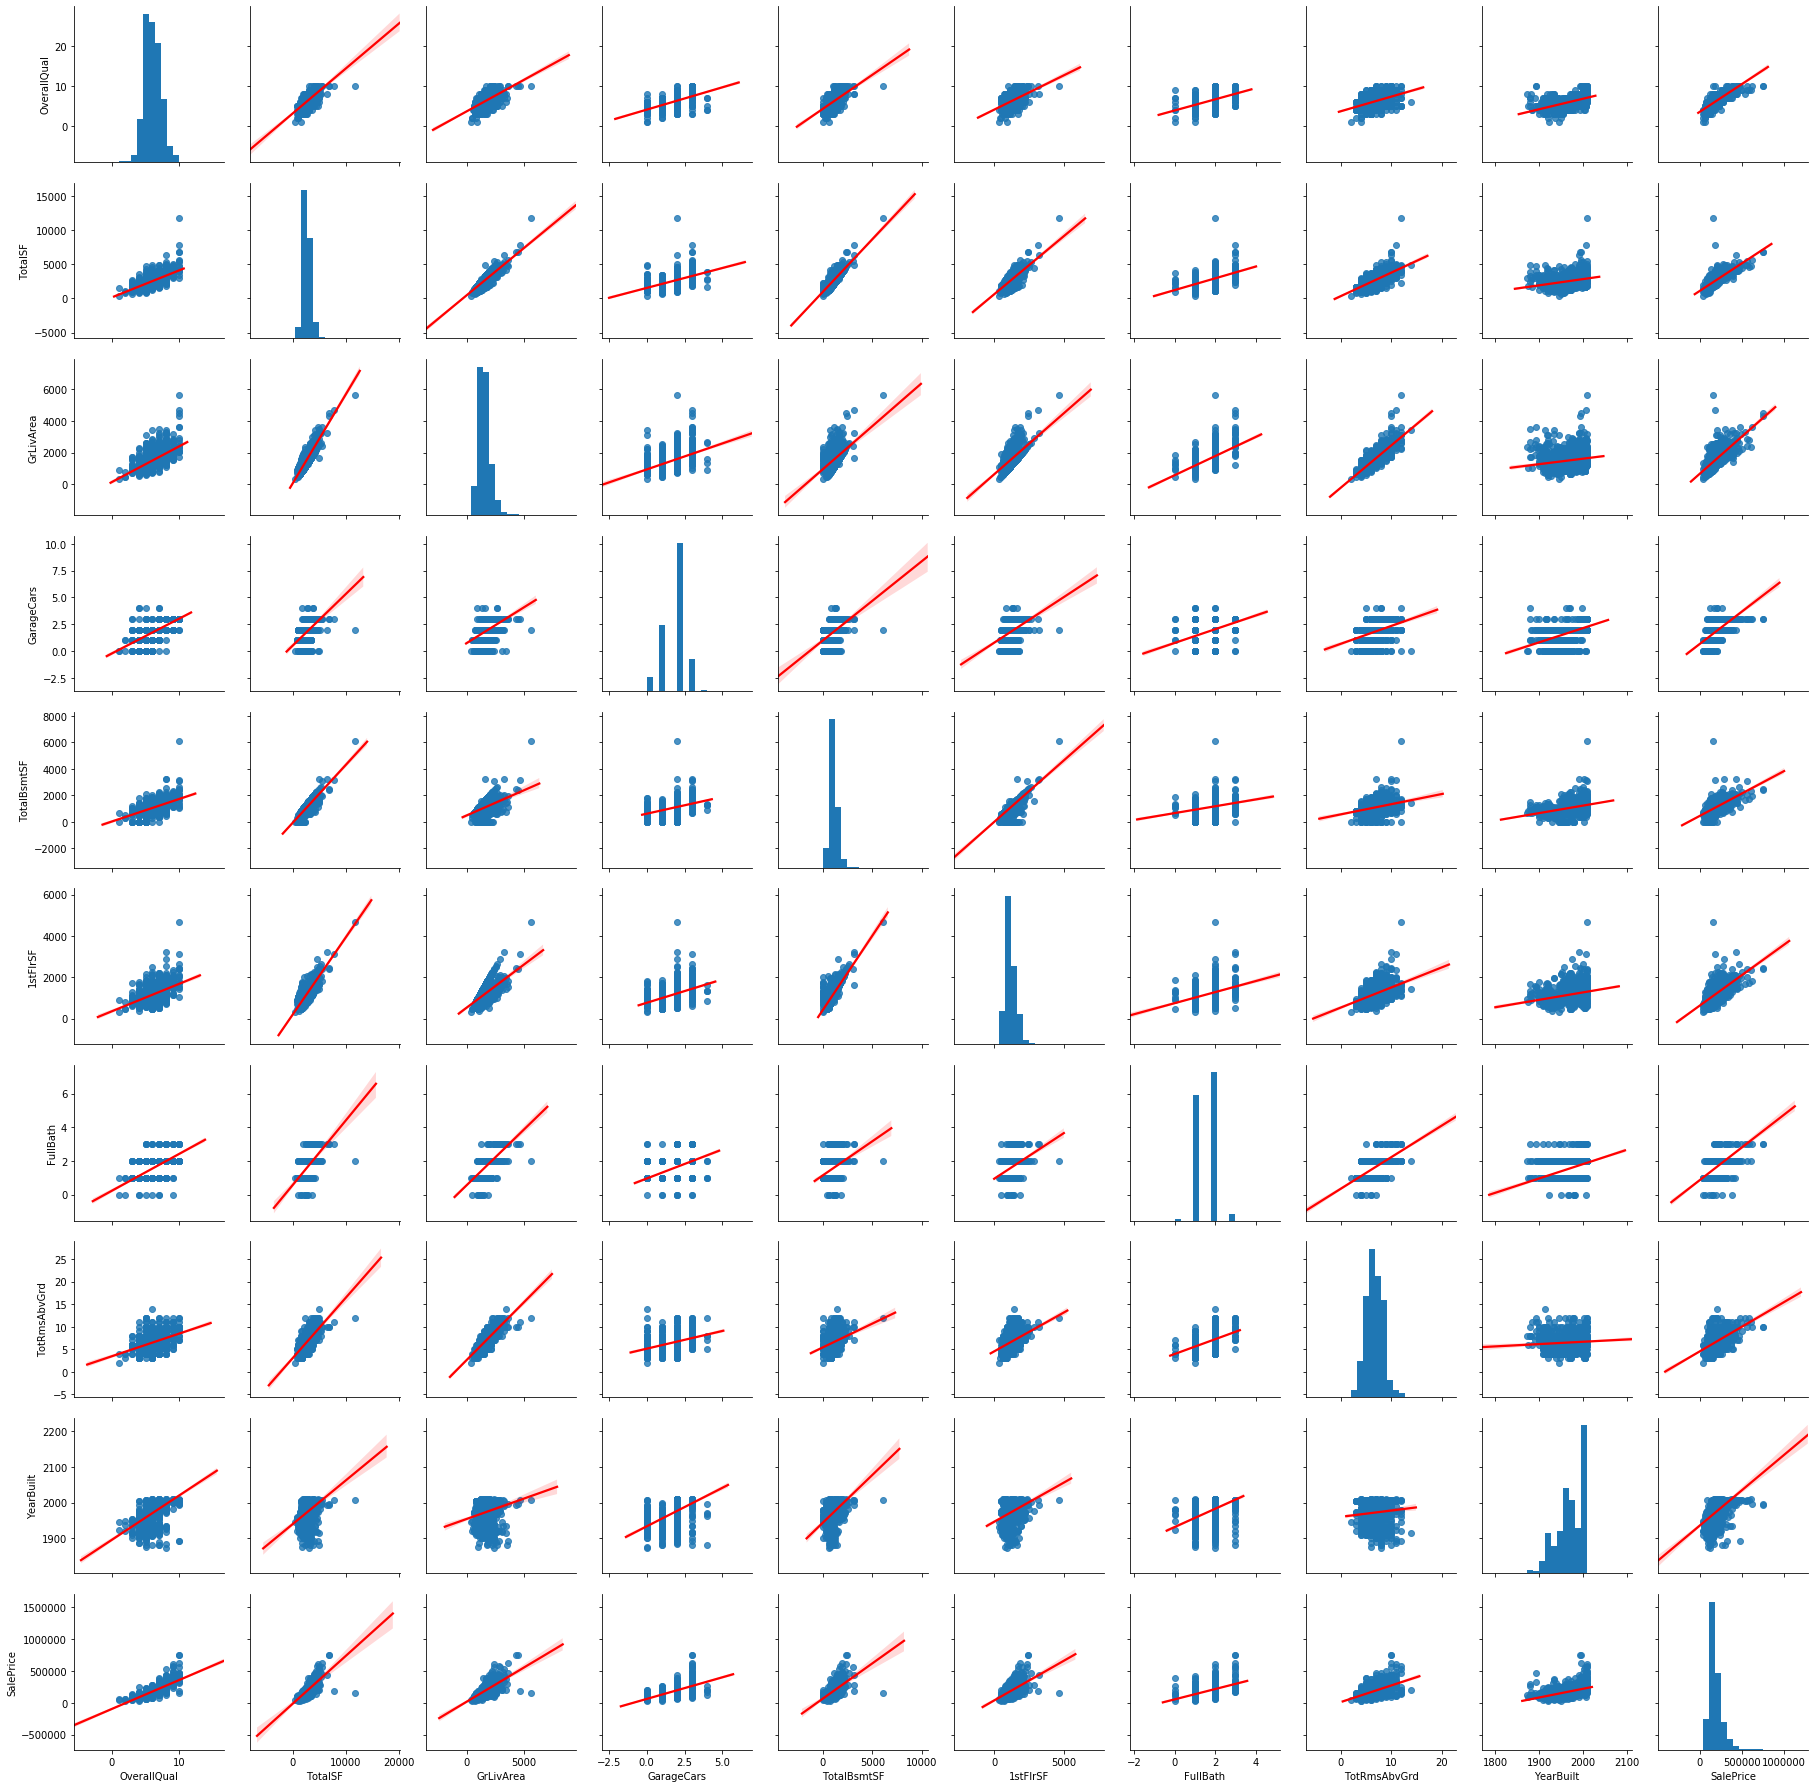

In [23]:
#Scatterplots between SalePrice and the top correlated variables
cols = ['OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'SalePrice']
sns.pairplot(df_train[cols],kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

#QUESTION: How to read these charts?
# Eg year built (y axis) has no correlation to Total SF (x axis)
# TotalBsmtSq is correlated to 1stFlrSF

## Numerical and Categorical Variables

In [40]:
#Seperate the variables to numerical and categorical

#QUESTION: Is this right to use np.number to identify numerical vs categorical variables?

numerical_variables = df_train.select_dtypes(include=[np.number]).columns
print("Number of numerical variables: ", len(numerical_variables))

categorical_variables = df_train.select_dtypes(exclude=[np.number]).columns
print("Number of categorical variables: ", len(categorical_variables))

print("Total number of variables: ", len(df_train.columns))

Number of numerical variables:  40
Number of categorical variables:  43
Total number of variables:  83


In [38]:
df_train[numerical_variables].head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_Log,TotalSF
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,2,2008,208500,12.247694,2566
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,5,2007,181500,12.109011,2524
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,9,2008,223500,12.317167,2706
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,272,0,0,0,0,2,2006,140000,11.849398,2473
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,12,2008,250000,12.429216,3343


In [39]:
df_train[categorical_variables].head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Use Boxplots to Visualize Correlations Between SalePrice and Categorial Variables

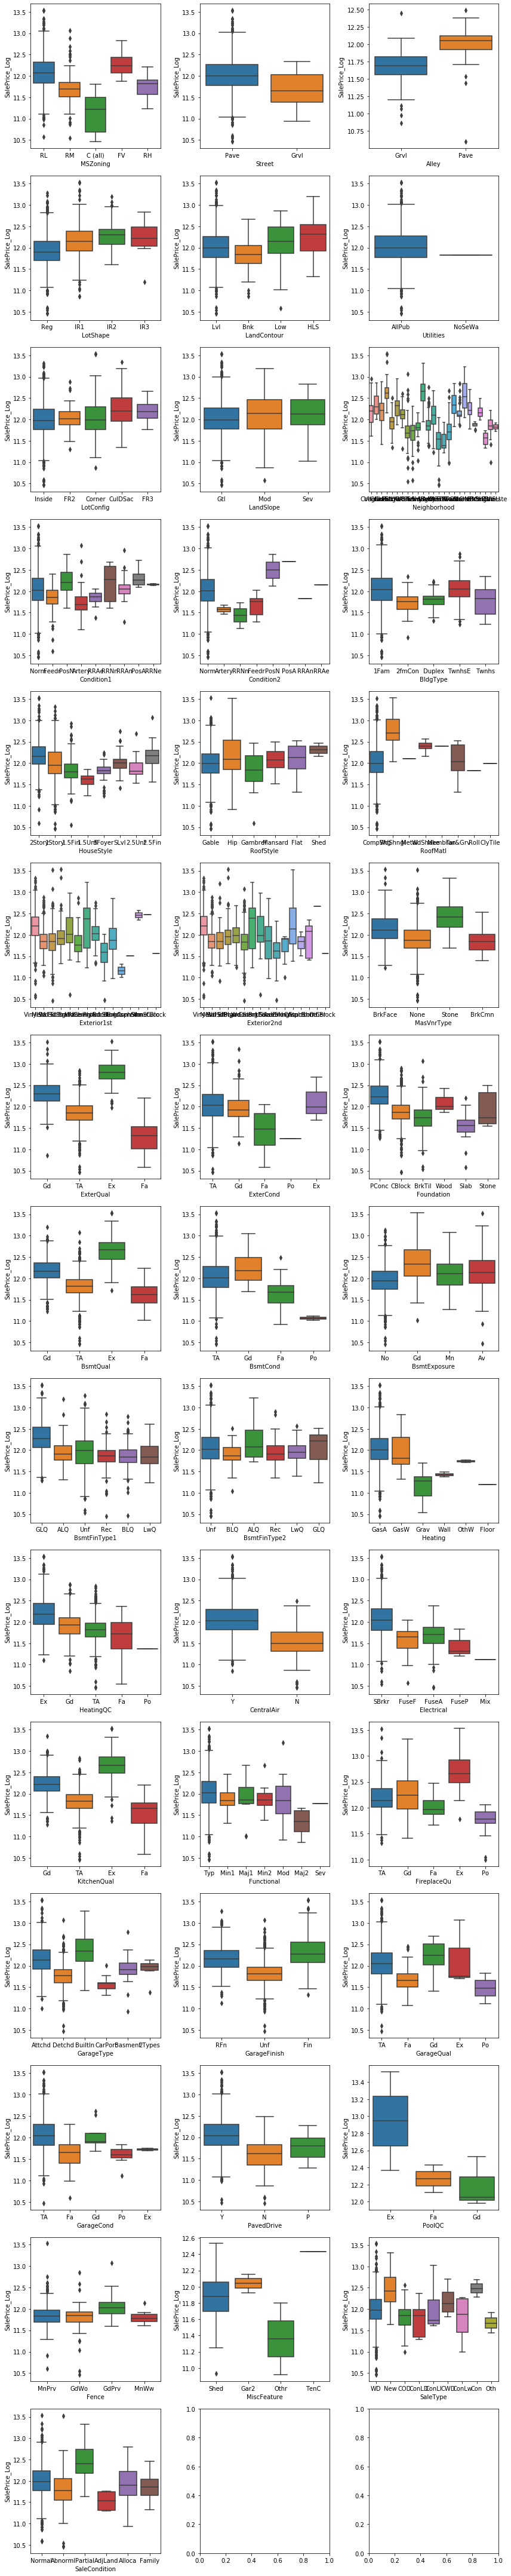

In [41]:
list_categorial_variables = list(categorical_variables)

rows = 15
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
i = 0

for r in range(0, rows):
    for c in range(0, cols):
        if i < len(categorical_variables):
            sns.boxplot(x=categorical_variables[i], y='SalePrice_Log', data=df_train, ax= axs[r][c])
            i = i + 1

plt.tight_layout() #spreads each of the charts to use up all the assigned space
plt.show()

## Conclustion: Categorial Variables
* The ones that have strong correlation to sale price log are - 'MSZoning', 'Neighborhood', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'BsmtQual', 'BsmtCond', 'Heating', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageQual', 'PoolQC', 'MiscFeature', 'SaleType'

**Question**: I identified correlation based on looking at the difference in median prices in each box. Not scientic, used eyeballing method. Any other better method?

In [42]:
print(categorical_variables)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


## Cleaning Missing Data
* Fill in missing values for highly correlated numerical and categorical variables

In [43]:
#Check which variables have missing values

high_corr_categorical_variables = ['MSZoning', 'Neighborhood', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'BsmtQual', 'BsmtCond', 'Heating', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageQual', 'PoolQC', 'MiscFeature', 'SaleType']
high_corr_numerical_variables = ['OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']

all_high_corr_variables = high_corr_categorical_variables + high_corr_numerical_variables


#Create a new dataframe with only highly correlated variables
df_high_corr_variables = df_train[all_high_corr_variables]

total_null_values = df_high_corr_variables.isnull().sum().sort_values(ascending=False)
percent_null_values = (df_high_corr_variables.isnull().sum() / df_high_corr_variables.isnull().count()).sort_values(ascending=False)
df_missing_data = pd.concat([total_null_values, percent_null_values], axis=1, keys=['Total', 'Percent'])
df_missing_data #this is a series

#QUESTION
# these variables are not missing, it has NA as values in them. Why isnull counting NA?
# df_missing_data is a series, I thought it's a dataframe

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
GarageType,81,0.055479
GarageQual,81,0.055479
BsmtQual,37,0.025342
BsmtCond,37,0.025342
CentralAir,0,0.000000
Neighborhood,0,0.000000
Condition2,0,0.000000
RoofMatl,0,0.000000


In [44]:
#All the variables with missing values are categorical.
#For each of the categorical variable with missing values, fill it with None

for i in range(0, len(df_missing_data)):
    if df_missing_data.loc[df_missing_data.index[i]]['Total'] > 0:
        print(df_missing_data.index[i])
        df_high_corr_variables[df_missing_data.index[i]] = df_high_corr_variables[df_missing_data.index[i]].fillna("None")
        


PoolQC
MiscFeature
GarageType
GarageQual
BsmtQual
BsmtCond


In [45]:
#Double check to see there's no more null values
df_high_corr_variables.isnull().sum()

MSZoning        0
Neighborhood    0
Condition2      0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
ExterQual       0
BsmtQual        0
BsmtCond        0
Heating         0
CentralAir      0
KitchenQual     0
GarageType      0
GarageQual      0
PoolQC          0
MiscFeature     0
SaleType        0
OverallQual     0
TotalSF         0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

## Mentor Notes on 7/10/2019

* There are flaws in the above methods. The above methods look at a liner correlation between SalePrice and another feature. In reality, correlation may be a non-linear relationship, e.g. SalePrice is correlated to number of bedrooms AND neighborhood. 

* The better approach is to clean the data first and then feed everything to the machine and let the machine decideds the relationship among the features.

# List of features with missing values


In [46]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479


## Fill missing values for categorical variables
For a few columns there is lots of NaN entries.
However, reading the data description we find this is not missing data:
For PoolQC, NaN is not missing data but means no pool, likewise for Fence, FireplaceQu etc.

In [47]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns in both Train and Test datasets
for col in cols_fillna:
    df_train[col].fillna('None',inplace=True)
    df_test[col].fillna('None',inplace=True)

In [48]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
BsmtQual,0,0.000000
RoofMatl,0,0.000000


## Fill missing values for numerical variables
Fill these missing values with the mean of each column

In [49]:
# fillna with mean for the remaining columns for both Train and Test datasets: LotFrontage, GarageYrBlt, MasVnrArea
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

In [50]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
TotalSF,0,0.0
YearRemodAdd,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


In [51]:
# Check to see if there anymore missing values in train data?
df_train.isnull().sum().sum()

0

In [52]:
# Check to see if there anymore missing values in test data?
df_test.isnull().sum().sum()

0

# Scikit-Learn will not accept categorical features by default

* We need to encode categorical features numerically.

In [53]:
# Print the number of categorical variables in training and test data set
categorical_variables = df_train.select_dtypes(exclude=[np.number]).columns
print("Training Data Set: Number of categorical variables: ", len(categorical_variables))

print(" ")

categorical_variables = df_test.select_dtypes(exclude=[np.number]).columns
print("Test Data Set: Number of categorical variables: ", len(categorical_variables))

Training Data Set: Number of categorical variables:  43
 
Test Data Set: Number of categorical variables:  43


In [54]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to each of the categorical features in the training data set
for c in categorical_variables:
    le = LabelEncoder()
    le.fit(list(df_train[c].values))
    df_train[c] = le.transform(list(df_train[c].values))
    
# Apply LabelEncoder to each of the categorical features in the test data set
for c in categorical_variables:
    le = LabelEncoder()
    le.fit(list(df_test[c].values))
    df_test[c] = le.transform(list(df_test[c].values))

# Shape of final train dataframe
print('Shape of df_train: {}'.format(df_train.shape))
print('Shape of df_test: {}'.format(df_test.shape))

# Double check to ensure there's no more categorical variables in train and test set.
# Print the number of categorical variables in training and test data set
categorical_variables = df_train.select_dtypes(exclude=[np.number]).columns
print("Training Data Set: Number of categorical variables: ", len(categorical_variables))
categorical_variables = df_test.select_dtypes(exclude=[np.number]).columns
print("Test Data Set: Number of categorical variables: ", len(categorical_variables))

Shape of df_train: (1460, 83)
Shape of df_test: (1459, 81)
Training Data Set: Number of categorical variables:  0
Test Data Set: Number of categorical variables:  0


# Modeling

* Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). In this case, the target is SalePrice.


* We'll adopt several regression analysis algorithms like Linear Regression, Ridge Regression, Lasso Regression and ElasticNet Regression. We'll compare the results and select the best model for predicting SalePrice.

*Credit* - https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression


In [55]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

#Question: RidgeCV vs Ridge - the first one comes with cross-validation estimator. Any reason why you would use the none CV version?

In [56]:
# Create features array from training data without Saleprice and Saleprice_log
# Create target array from training data with Saleprice_log
X = df_train.drop(['SalePrice', 'SalePrice_Log'], axis=1)
y = df_train['SalePrice_Log']
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [57]:
# Let's try very simple linear regression model without scaling any of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1022, 81), (438, 81), (1022,), (438,))

In [58]:
# Simple linear model without regularization
# R-squared = 1, that means a perfect fit
# rmse = Root mean squared error. Best value is 0

# Create the regressor
lr = LinearRegression()

# Fit the regressor to the training data
lr.fit(X_train, y_train)

# Predict on X test and train data
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
print(y_pred_test.shape)

# Compute RMSE score with 2 parameters - your predicted values and the other being the true values
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error: {}'.format(rmse))

# Compute the R-square test data
print('R^2: {}'.format(lr.score(X_test, y_test)))


(438,)
Root Mean Squared Error: 0.150169359238984
R^2: 0.8670713454968436


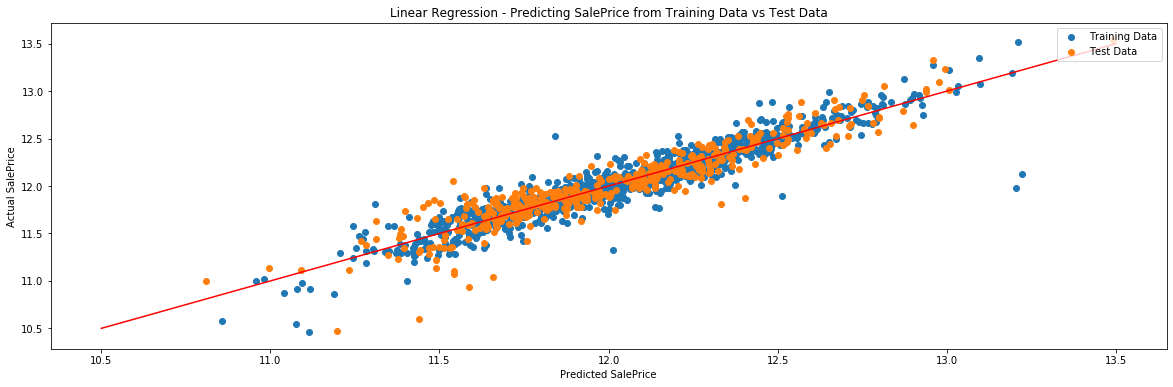

In [62]:
# Plot Predicted values of Saleprice against real values of Saleprice
plt.figure(figsize=(20,6))
plt.scatter(y_pred_train, y_train, label='Training Data')
plt.scatter(y_pred_test, y_test, label='Test Data')
plt.title('Linear Regression - Predicting SalePrice from Training Data vs Test Data')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.legend(loc='upper right')
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

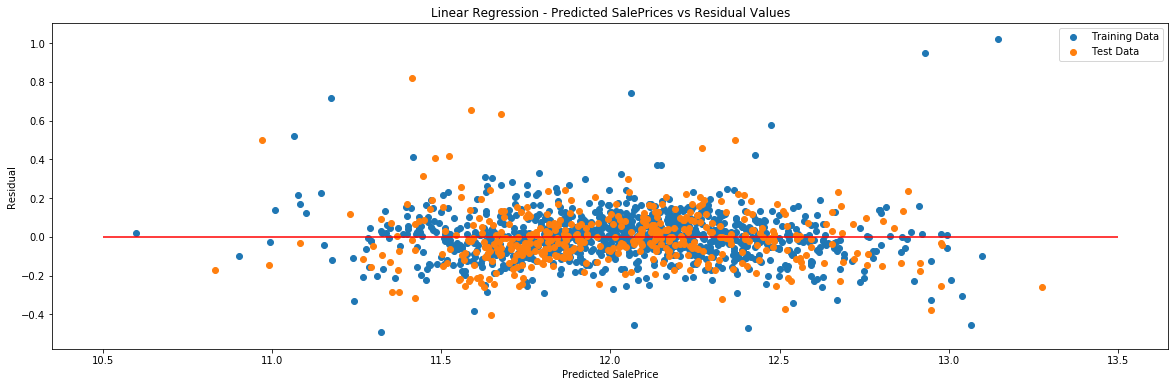

In [120]:
# Plot the predicted saleprices vs the residual values
plt.figure(figsize=(20,6))
plt.scatter(y_pred_train, y_pred_train - y_train, label='Training Data')
plt.scatter(y_pred_test, y_pred_test - y_test, label='Test Data')
plt.title('Linear Regression - Predicted SalePrices vs Residual Values')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residual')
plt.legend(loc='upper right')
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [63]:
# The coefficients for each feature
pd.DataFrame({'features': X.columns, 'estimatedCoefficients':lr.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,Id,-0.000008
1,MSSubClass,-0.000441
2,MSZoning,-0.024419
3,LotFrontage,-0.000846
4,LotArea,0.000001
5,Street,0.045537
6,Alley,0.036843
7,LotShape,-0.006543
8,LandContour,0.018261
9,Utilities,-0.203185


## Simple Linear Regression Observation
* The $R^2$ is 0.87 which is really close to 1. This shows that the model is close to a perfect fit.
* The Root Mean Squared Error is 0.15 which is close to 0 which means the erro is very low.
* Based on the scatter plot, we can also see that majority of the predicted Saleprice is very close to to actual Saleprice.

It's easy to draw a conclusion here that this is a good model. However, we didn't look at the skewness of that data and we didn't standardize our data. Most models use some for of distance to inform the prediction. If the data is too wide spread, the model will be misinformed. Let's look at the data again to see if any normalizing is needed and then run the linear regression model again.

# Method 1: Copy the Current Training Data into a New Dataframe and Scale the Data

These are the numerical features we need in check the spread and scale them if necessary.

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [64]:
df_train_scale = df_train.copy()
df_test_scale = df_test.copy()

In [65]:
numerical_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [66]:
# Find features that are skewed in the training data
from scipy.stats import skew 

train_skewed_features = df_train_scale[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)
train_skewed_features

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -0.667488
dtype: float64

In [67]:
train_skewed_features = train_skewed_features[abs(train_skewed_features)>0.5]

print('There are {} skewed numerical features to scale'.format(train_skewed_features.shape[0]))
train_skewed_features

There are 29 skewed numerical features to scale


MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -0.667488
dtype: float64

In [68]:
# Scale the training and test data using log1p
for feat in train_skewed_features.index:
    df_train_scale[feat] = np.log1p(df_train_scale[feat])
    df_test_scale[feat] = np.log1p(df_test_scale[feat])

In [69]:
# Create features array from training data without Saleprice and Saleprice_log
X_Scale = df_train_scale.drop(['SalePrice', 'SalePrice_Log'], axis=1)

In [70]:
# Let's try very simple linear regression model using SCALED DATA
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_Scale, y, test_size=0.3, random_state=42)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((1022, 81), (438, 81), (1022,), (438,))

In [71]:
# Simple linear model without regularization using SCALED DATA
# R-squared = 1, that means a perfect fit
# rmse = Root mean squared error. Best value is 0

# Create the regressor
lr2 = LinearRegression()

# Fit the regressor to the training data
lr2.fit(X_train2, y_train2)

# Predict on X test and train data
y_pred_test2 = lr2.predict(X_test2)
y_pred_train2 = lr2.predict(X_train2)

# Compute RMSE score with 2 parameters - your predicted values and the other being the true values
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred_test2))
print('Scaled Data: Root Mean Squared Error: {}'.format(rmse2))

# Compute the R-square test data
print('Scale Data R^2: {}'.format(lr2.score(X_test2, y_test2)))

print(" ")
# Compute RMSE score with 2 parameters - your predicted values and the other being the true values
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Unscaled Data Root Mean Squared Error: {}'.format(rmse))

# Compute the R-square test data
print('Unscaled Data R^2: {}'.format(lr.score(X_test, y_test)))

Scaled Data: Root Mean Squared Error: 0.14122624370812775
Scale Data R^2: 0.8824326390600356
 
Unscaled Data Root Mean Squared Error: 0.150169359238984
Unscaled Data R^2: 0.8670713454968436


# Method 2:  Use StandardScaler() in a Pipeline

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()), ('linreg', LinearRegression())]
pipeline = Pipeline(steps)
linreg_scaled = pipeline.fit(X_train, y_train)
linreg_unscaled = LinearRegression().fit(X_train, y_train)

#Predict
y_pred_test_scaled = linreg_scaled.predict(X_test)
y_pred_test_unscaled = linreg_unscaled.predict(X_test)

# Compute Scaled Data RMSE score with 2 parameters - your predicted values and the other being the true values
print('------ Using StandardScaler Method --------')
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_scaled))
print('Scaled Data Root Mean Squared Error: {}'.format(rmse))
# Compute the R-square test data
print('Scaled Data R^2: {}'.format(linreg_scaled.score(X_test, y_test)))

print(" ")

# Compute Unscaled Data RMSE score with 2 parameters - your predicted values and the other being the true values
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Unscaled Root Mean Squared Error: {}'.format(rmse))

# Compute the R-square test data
print('Unscaled Data R^2: {}'.format(lr.score(X_test, y_test)))


------ Using StandardScaler Method --------
Scaled Data Root Mean Squared Error: 0.15013259829692685
Scaled Data R^2: 0.8671364184848537
 
Unscaled Root Mean Squared Error: 0.150169359238984
Unscaled Data R^2: 0.8670713454968436


## Observation

**Method 1** where we identify the numerical features that are skewed and we log them individually resulted in a much improve results. Root Mean Squared Error reduced from 0.15 to 0.14 and $R^2$ improved from 0.86 to 0.88.

**Method 2** where we used StandardScaler from sklearn, the improvement was insignificant. The Root Mean Squared Error reduced only from 0.15016 to 0.15011 and $R^2$ only improved very little from 0.8671 to 0.8670.

Given **Method 1** provided a much improved prediction, we'll be using the data set in Method 1 to explore other models like RidgeCV, LassoCV, ElasticNetCV.

# RidgeCV + Cross-Validation

* Cross-validation - model performance is dependent on the way data is split and may not be generalized. Cross-validation is a way to overcome this issue.

* RidgeCV - Large coefficients can lead to overfitting, that's way we need to regularize to penalize large coefficients. RidgeCV comes with built in cross-validation.

* Use these train and test sets - X_train2, X_test2, y_train2, y_test2

In [178]:
# Let's use 5 folds
ridge_alpha1 = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 80, 100], cv=5)
ridge_alpha1.fit(X_train2, y_train2)
alpha1 = ridge_alpha1.alpha_
print('Ridge - Best alpha from 1st set of Alphas:', alpha1)

# Predict on X test and train data using Alpha 1
y_pred_test_alpha1 = ridge_alpha1.predict(X_test2)
y_pred_train_alpha1 = ridge_alpha1.predict(X_train2)

# Using Alpha1 - Compute RMSE score with 2 parameters - your predicted values and the other being the true values
rmse = np.sqrt(mean_squared_error(y_test2, y_pred_test_alpha1))
print('Ridge Alpha 1: Root Mean Squared Error: {}'.format(rmse))

# Compute the R-square test data
print('Ridge Alpha 1 R^2: {}'.format(ridge_alpha1.score(X_test2, y_test2)))

# Check to see what features RidgeCV picked and what features were eliminated
coef_alpha1 = pd.Series(ridge_alpha1.coef_, index = X_train2.columns)
print("Ridge Alpha 1 picked " + str(sum(coef_alpha1 != 0)) + " features and eliminated the other " +  str(sum(coef_alpha1 == 0)) + " features")


print(" ")

# Find a better Alpha
print("Try to find a better Alpha. Create new sets of alphas around the Best Alpha: ", alpha1)
print(" ")
alphas2 = [alpha1 * .6, alpha1 * .65, alpha1 * .7, alpha1 * .75, alpha1 * .8, alpha1 * .85, alpha1 * .9, alpha1 * .95, alpha1, alpha1 * 1.05, alpha1 * 1.1, alpha1 * 1.15,alpha1 * 1.25, alpha1 * 1.3, alpha1 * 1.35, alpha1 * 1.4, alpha1 * 1.5]

# Run RidgeCV again with 2nd set of alphas
ridge_alpha2 = RidgeCV(alphas=alphas2, cv=5)
ridge_alpha2.fit(X_train2, y_train2)
alpha2 = ridge_alpha2.alpha_
print('Ridge - Best alpha from 2nd set of Alphas:', alpha2)

# Predict on X test and train data using Alpha 2
y_pred_test_alpha2 = ridge_alpha2.predict(X_test2)
y_pred_train_alpha2 = ridge_alpha2.predict(X_train2)

# Using Alpha2 - Compute RMSE score with 2 parameters - your predicted values and the other being the true values
rmse = np.sqrt(mean_squared_error(y_test2, y_pred_test_alpha2))
print('Ridge Alpha 2: Root Mean Squared Error: {}'.format(rmse))

# Compute the R-square test data
print('Ridge Alpha 2 R^2: {}'.format(ridge_alpha2.score(X_test2, y_test2)))

# Check to see what features RidgeCV picked and what features were eliminated
coef_alpha2 = pd.Series(ridge_alpha2.coef_, index = X_train2.columns)
print("Ridge Alpha 2 picked " + str(sum(coef_alpha2 != 0)) + " features and eliminated the other " +  str(sum(coef_alpha2 == 0)) + " features")


Ridge - Best alpha from 1st set of Alphas: 6.0
Ridge Alpha 1: Root Mean Squared Error: 0.14045299589028287
Ridge Alpha 1 R^2: 0.8837165340267129
Ridge Alpha 1 picked 81 features and eliminated the other 0 features
 
Try to find a better Alpha. Create new sets of alphas around the Best Alpha:  6.0
 
Ridge - Best alpha from 2nd set of Alphas: 5.1
Ridge Alpha 2: Root Mean Squared Error: 0.1404341276082839
Ridge Alpha 2 R^2: 0.8837477746825583
Ridge Alpha 2 picked 81 features and eliminated the other 0 features


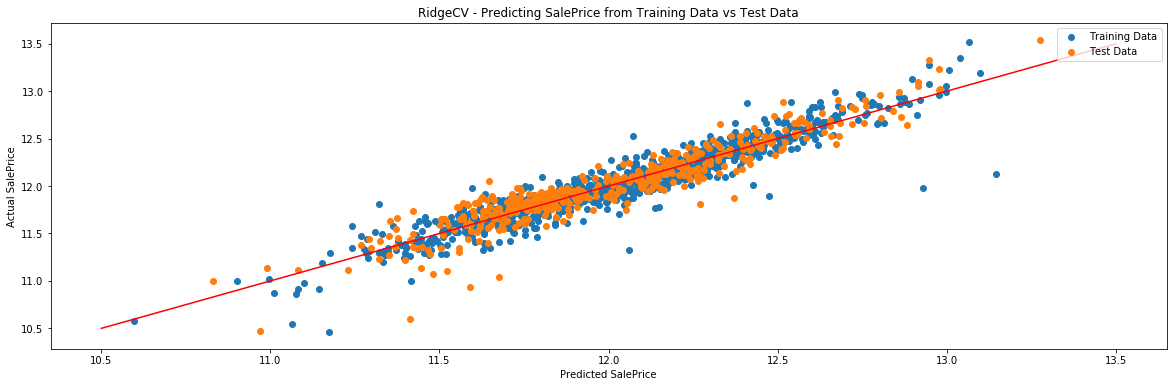

In [138]:
# RidgeCV - Plot Predicted values of Saleprice against real values of Saleprice using Alpha=5.1
plt.figure(figsize=(20,6))
plt.scatter(y_pred_train_alpha2, y_train2, label='Training Data')
plt.scatter(y_pred_test_alpha2, y_test2, label='Test Data')
plt.title('RidgeCV - Predicting SalePrice from Training Data vs Test Data')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.legend(loc='upper right')
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

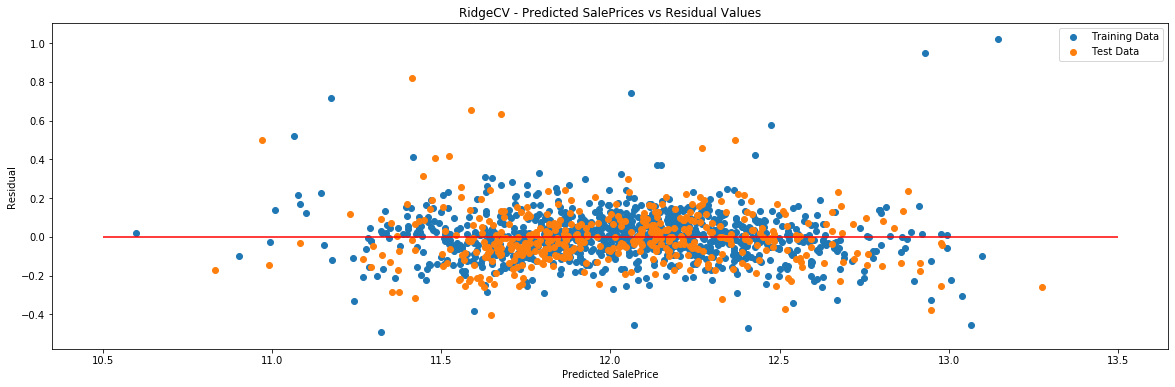

In [121]:
# RidgeCV - Plot the predicted saleprices vs the residual values
plt.figure(figsize=(20,6))
plt.scatter(y_pred_train_alpha2, y_pred_train_alpha2 - y_train2, label='Training Data')
plt.scatter(y_pred_test_alpha2, y_pred_test_alpha2 - y_test2, label='Test Data')
plt.title('RidgeCV - Predicted SalePrices vs Residual Values')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residual')
plt.legend(loc='upper right')
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

## Conclusion
* Picking the right alpha is important for Ridge, RidgeCV models. 
* Using **Linear Regression**, the best results scaling skewed data using Log are:
  * Root Mean Squared Error: 0.150169359238984
  * $R^2$: 0.8670713454968436
* Using **RidgeCV**, we can see an improvement in the results:
  * Root Mean Squared Error: 0.1404341276082839 (closer to 0)
  * $R^2$: 0.8837477746825583 (closer to 1)
  
RidgeCV performed better than Linear Regression.


# LassoCV + Cross-Validation
* Can be used to select important features of a dataset
* Shrinks the coefficients of less important features to exactly 0
* Lasso linear model with iterative fitting along a regularization path
* The best model is selected by cross-validation


In [177]:
# Let's use 5 folds
lasso_alpha1 = LassoCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 80, 100], cv=5)
lasso_alpha1.fit(X_train2, y_train2)
alpha1 = lasso_alpha1.alpha_
print('Lasso - Best alpha from 1st set of Alphas:', alpha1)

# Predict on X test and train data using Alpha 1
lasso_y_pred_test_alpha1 = lasso_alpha1.predict(X_test2)
lasso_y_pred_train_alpha1 = lasso_alpha1.predict(X_train2)

# Using Alpha1 - Compute RMSE score with 2 parameters - your predicted values and the other being the true values
rmse = np.sqrt(mean_squared_error(y_test2, lasso_y_pred_test_alpha1))
print('Lasso Alpha 1: Root Mean Squared Error: {}'.format(rmse))

# Compute the R-square test data
print('Lasso Alpha 1 R^2: {}'.format(lasso_alpha1.score(X_test2, y_test2)))

# Check to see what features LassoCV picked and what features were eliminated
lasso_coef_alpha1 = pd.Series(lasso_alpha1.coef_, index = X_train2.columns)
print("Lasso Alpha 1 picked " + str(sum(lasso_coef_alpha1 != 0)) + " features and eliminated the other " +  str(sum(lasso_coef_alpha1 == 0)) + " features")

print(" ")

# Find a better Alpha
print("Try to find a better Alpha. Create new sets of alphas around the Best Alpha: ", alpha1)
print(" ")
alphas2 = [alpha1 * .6, alpha1 * .65, alpha1 * .7, alpha1 * .75, alpha1 * .8, alpha1 * .85, alpha1 * .9, alpha1 * .95, alpha1, alpha1 * 1.05, alpha1 * 1.1, alpha1 * 1.15,alpha1 * 1.25, alpha1 * 1.3, alpha1 * 1.35, alpha1 * 1.4, alpha1 * 1.5]

# Run LassoCV again with 2nd set of alphas
lasso_alpha2 = LassoCV(alphas=alphas2, cv=5)
lasso_alpha2.fit(X_train2, y_train2)
alpha2 = lasso_alpha2.alpha_
print('Lasso - Best alpha from 2nd set of Alphas:', alpha2)

# Predict on X test and train data using Alpha 2
lasso_y_pred_test_alpha2 = lasso_alpha2.predict(X_test2)
lasso_y_pred_train_alpha2 = lasso_alpha2.predict(X_train2)

# Using Alpha2 - Compute RMSE score with 2 parameters - your predicted values and the other being the true values
rmse = np.sqrt(mean_squared_error(y_test2, lasso_y_pred_test_alpha2))
print('Lasso Alpha 2: Root Mean Squared Error: {}'.format(rmse))

# Compute the R-square test data
print('Lasso Alpha 2 R^2: {}'.format(lasso_alpha2.score(X_test2, y_test2)))

# Check to see what features RidgeCV picked and what features were eliminated
lasso_coef_alpha2 = pd.Series(lasso_alpha2.coef_, index = X_train2.columns)
print("Lasso Alpha 2 picked " + str(sum(lasso_coef_alpha2 != 0)) + " features and eliminated the other " +  str(sum(lasso_coef_alpha2 == 0)) + " features")



Lasso - Best alpha from 1st set of Alphas: 0.01
Lasso Alpha 1: Root Mean Squared Error: 0.1499212236932158
Lasso Alpha 1 R^2: 0.8675102775562774
Lasso Alpha 1 picked 34 features and eliminated the other 47 features
 
Try to find a better Alpha. Create new sets of alphas around the Best Alpha:  0.01
 
Lasso - Best alpha from 2nd set of Alphas: 0.006
Lasso Alpha 2: Root Mean Squared Error: 0.14640770678725393
Lasso Alpha 2 R^2: 0.8736475026860452
Lasso Alpha 2 picked 44 features and eliminated the other 37 features


#### Alpha = 0.006 produced a better result as the RMSE is closer to 0 and the $R^2$ is closer to 1.

#### Let's look at what are the most important and least important features

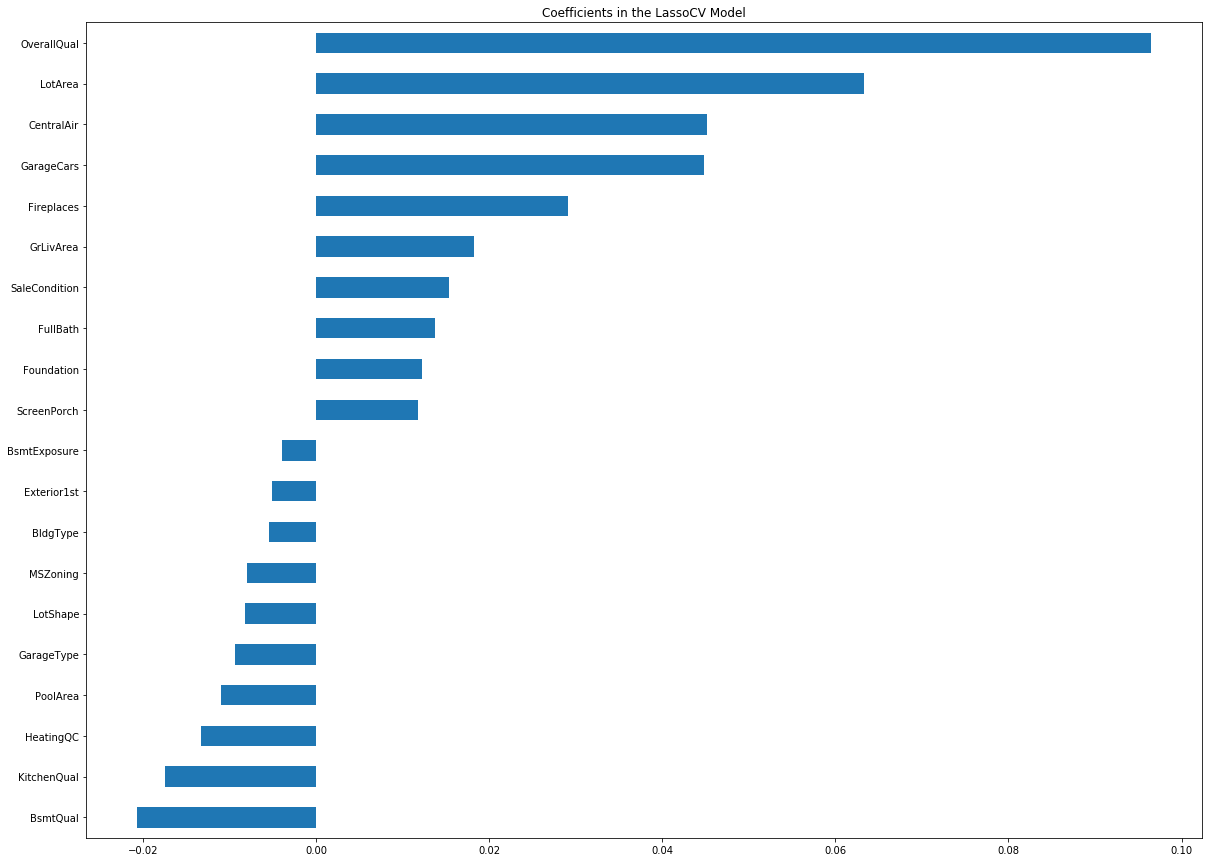

In [149]:
important_features = pd.concat([lasso_coef_alpha2.sort_values().head(10), lasso_coef_alpha2.sort_values().tail(10)])
plt.figure(figsize=(20,15))
important_features.plot(kind='barh')
plt.title("Coefficients in the LassoCV Model")
plt.show()

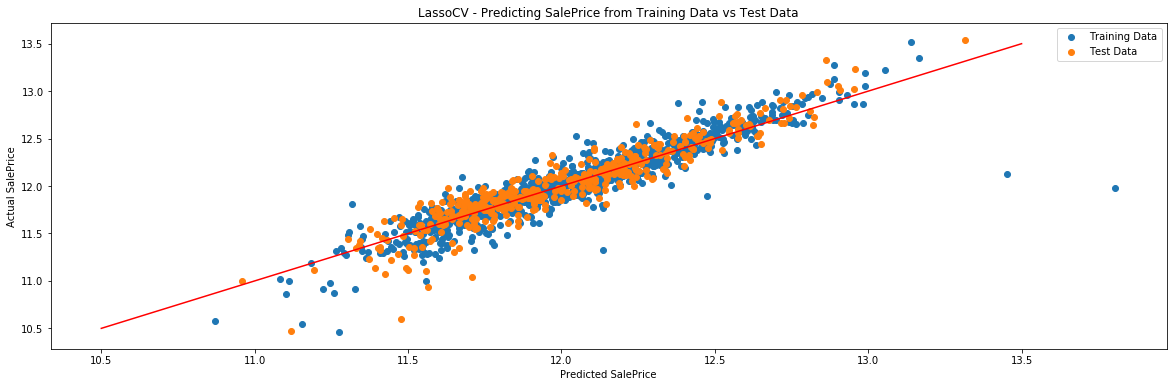

In [171]:
# LassoCV - Plot Predicted values of Saleprice against real values of Saleprice using Alpha=0.006
plt.figure(figsize=(20,6))
plt.scatter(lasso_y_pred_train_alpha2, y_train2, label='Training Data')
plt.scatter(lasso_y_pred_test_alpha2, y_test2, label='Test Data')
plt.title('LassoCV - Predicting SalePrice from Training Data vs Test Data')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.legend(loc='upper right')
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

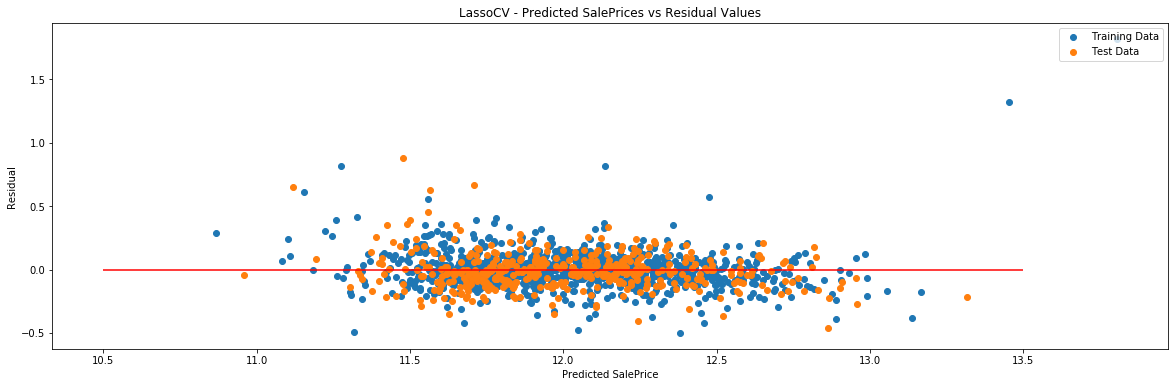

In [151]:
# LassoCV - Plot the predicted saleprices vs the residual values
plt.figure(figsize=(20,6))
plt.scatter(lasso_y_pred_train_alpha2, lasso_y_pred_train_alpha2 - y_train2, label='Training Data')
plt.scatter(lasso_y_pred_test_alpha2, lasso_y_pred_test_alpha2 - y_test2, label='Test Data')
plt.title('LassoCV - Predicted SalePrices vs Residual Values')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residual')
plt.legend(loc='upper right')
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

## Conclusion
* Picking the right alpha is important for Lasso, LassoCV models. 
* Using **Linear Regression**, the best results scaling skewed data using Log transformation are:
  * Root Mean Squared Error: 0.150169359238984
  * $R^2$: 0.8670713454968436
  
* Using **RidgeCV**, we can see an improvement in the results:
  * Root Mean Squared Error: 0.1404341276082839 (closer to 0)
  * $R^2$: 0.8837477746825583 (closer to 1)
  
* Using **LassoCV**, we did not see an improvement in the results:
  * Root Mean Squared Error: 0.14640770678725393
  * $R^2$: 0.8736475026860452



* RidgeCV performed better than Linear Regression and LassoCV.



# ElasticNetCV + Cross-Validation
* ElasticNet is another regularization model. It tends to select more features than Lasso hence leading to larger models (also more expensive to train) but also be more accurate in general.

* In particular, Lasso is very sensitive to correlation between features and might select randomly one out of 2 very correlated informative features while ElasticNet will be more likely to select both which should lead to a more stable model.

* Use these train and test sets - X_train2, X_test2, y_train2, y_test2

In [176]:
# Let's use 5 folds
elasticnet_alpha1 = ElasticNetCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 80, 100], cv=5)
elasticnet_alpha1.fit(X_train2, y_train2)
alpha1 = elasticnet_alpha1.alpha_
print('ElasticNet - Best alpha from 1st set of Alphas:', alpha1)

# Predict on X test and train data using Alpha 1
elasticnet_y_pred_test_alpha1 = elasticnet_alpha1.predict(X_test2)
elasticnet_y_pred_train_alpha1 = elasticnet_alpha1.predict(X_train2)

# Using Alpha1 - Compute RMSE score with 2 parameters - your predicted values and the other being the true values
rmse = np.sqrt(mean_squared_error(y_test2, elasticnet_y_pred_test_alpha1))
print('ElasticNet Alpha 1: Root Mean Squared Error: {}'.format(rmse))

# Compute the R-square test data
print('ElasticNet Alpha 1 R^2: {}'.format(elasticnet_alpha1.score(X_test2, y_test2)))

# Check to see what features LassoCV picked and what features were eliminated
elasticnet_coef_alpha1 = pd.Series(elasticnet_alpha1.coef_, index = X_train2.columns)
print("ElasticNet Alpha 1 picked " + str(sum(elasticnet_coef_alpha1 != 0)) + " features and eliminated the other " +  str(sum(elasticnet_coef_alpha1 == 0)) + " features")

print(" ")

# Find a better Alpha
print("Try to find a better Alpha. Create new sets of alphas around the Best Alpha: ", alpha1)
print(" ")
alphas2 = [alpha1 * .6, alpha1 * .65, alpha1 * .7, alpha1 * .75, alpha1 * .8, alpha1 * .85, alpha1 * .9, alpha1 * .95, alpha1, alpha1 * 1.05, alpha1 * 1.1, alpha1 * 1.15,alpha1 * 1.25, alpha1 * 1.3, alpha1 * 1.35, alpha1 * 1.4, alpha1 * 1.5]

# Run ElasticNetCV again with 2nd set of alphas
elasticnet_alpha2 = ElasticNetCV(alphas=alphas2, cv=5)
elasticnet_alpha2.fit(X_train2, y_train2)
alpha2 = elasticnet_alpha2.alpha_
print('ElasticNet - Best alpha from 2nd set of Alphas:', alpha2)

# Predict on X test and train data using Alpha 2
elasticnet_y_pred_test_alpha2 = elasticnet_alpha2.predict(X_test2)
elasticnet_y_pred_train_alpha2 = elasticnet_alpha2.predict(X_train2)

# Using Alpha2 - Compute RMSE score with 2 parameters - your predicted values and the other being the true values
rmse = np.sqrt(mean_squared_error(y_test2, elasticnet_y_pred_test_alpha2))
print('ElasticNet Alpha 2: Root Mean Squared Error: {}'.format(rmse))

# Compute the R-square test data
print('ElasticNet Alpha 2 R^2: {}'.format(elasticnet_alpha2.score(X_test2, y_test2)))

# Check to see what features RidgeCV picked and what features were eliminated
elasticnet_coef_alpha2 = pd.Series(elasticnet_alpha2.coef_, index = X_train2.columns)
print("ElasticNet Alpha 2 picked " + str(sum(elasticnet_coef_alpha2 != 0)) + " features and eliminated the other " +  str(sum(elasticnet_coef_alpha2 == 0)) + " features")


ElasticNet - Best alpha from 1st set of Alphas: 0.01
ElasticNet Alpha 1: Root Mean Squared Error: 0.14529144031066968
ElasticNet Alpha 1 R^2: 0.8755668739796171
ElasticNet Alpha 1 picked 47 features and eliminated the other 34 features
 
Try to find a better Alpha. Create new sets of alphas around the Best Alpha:  0.01
 
ElasticNet - Best alpha from 2nd set of Alphas: 0.006
ElasticNet Alpha 2: Root Mean Squared Error: 0.14091647560058385
ElasticNet Alpha 2 R^2: 0.8829478220364425
ElasticNet Alpha 2 picked 57 features and eliminated the other 24 features


#### Alpha = 0.006 produced a better result as the RMSE is closer to 0 and the $R^2$ is closer to 1.

#### Let's look at what are the most important and least important features

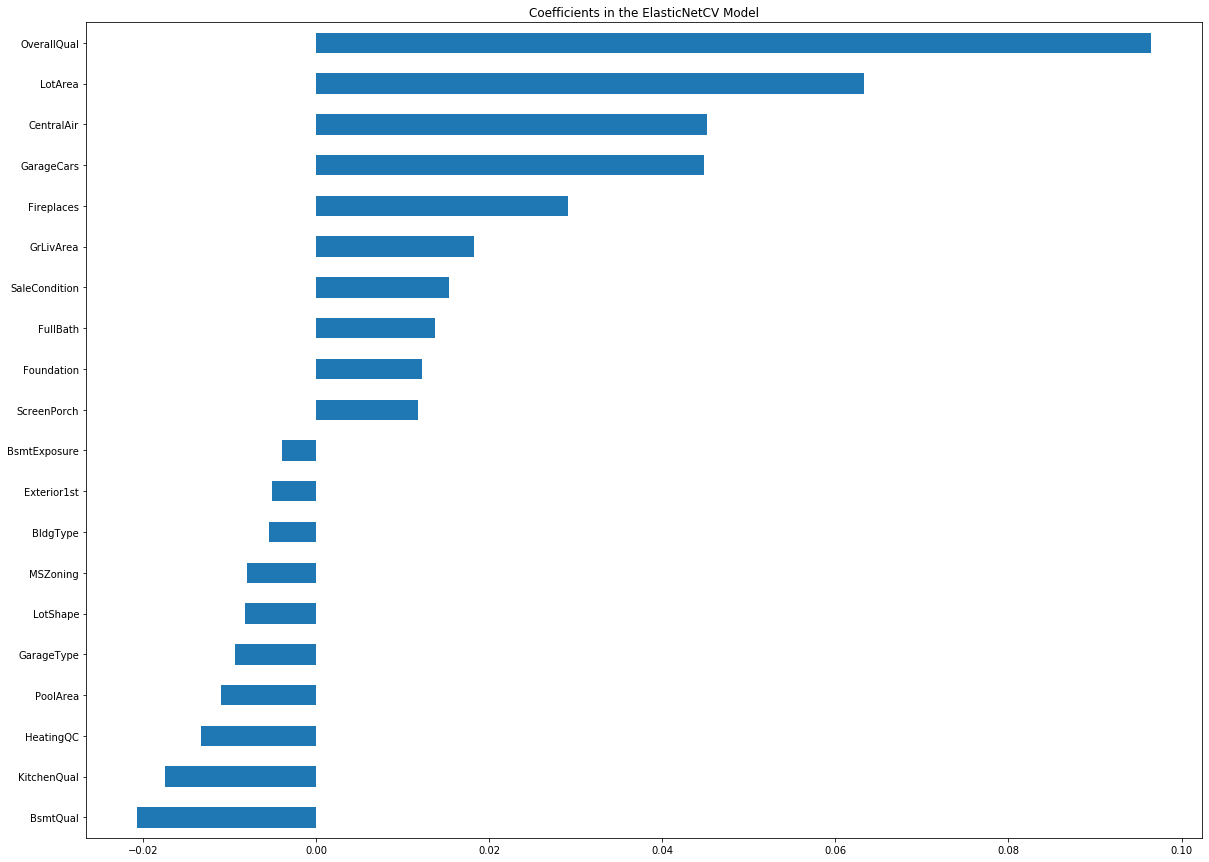

In [179]:
elasticnet_important_features = pd.concat([elasticnet_coef_alpha2.sort_values().head(10), elasticnet_coef_alpha2.sort_values().tail(10)])
plt.figure(figsize=(20,15))
important_features.plot(kind='barh')
plt.title("Coefficients in the ElasticNetCV Model")
plt.show()

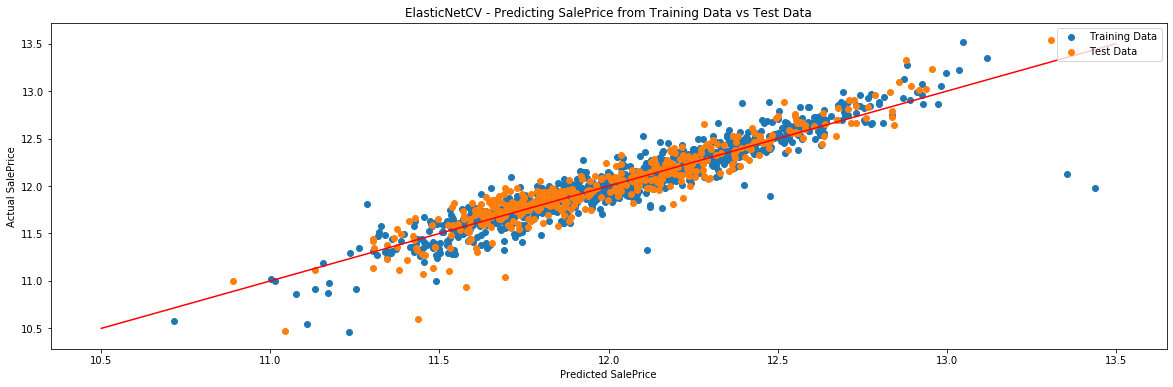

In [173]:
# ElasticNetCV - Plot Predicted values of Saleprice against real values of Saleprice using Alpha=0.006
plt.figure(figsize=(20,6))
plt.scatter(elasticnet_y_pred_train_alpha2, y_train2, label='Training Data')
plt.scatter(elasticnet_y_pred_test_alpha2, y_test2, label='Test Data')
plt.title('ElasticNetCV - Predicting SalePrice from Training Data vs Test Data')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.legend(loc='upper right')
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

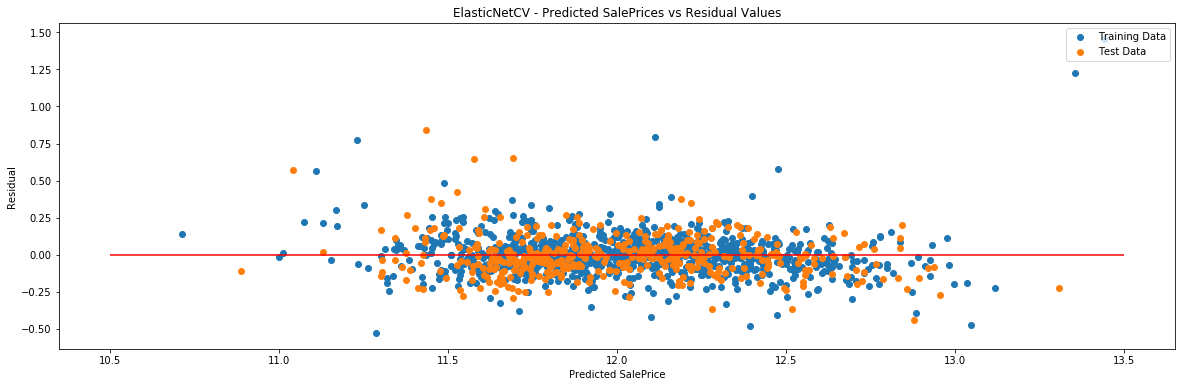

In [174]:
# ElasticNetCV - Plot the predicted saleprices vs the residual values
plt.figure(figsize=(20,6))
plt.scatter(elasticnet_y_pred_train_alpha2, elasticnet_y_pred_train_alpha2 - y_train2, label='Training Data')
plt.scatter(elasticnet_y_pred_test_alpha2, elasticnet_y_pred_test_alpha2 - y_test2, label='Test Data')
plt.title('ElasticNetCV - Predicted SalePrices vs Residual Values')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residual')
plt.legend(loc='upper right')
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

## Conclusion - Linear, RidgeCV, LassoCV, ElasticNetCV Regression
* Picking the right alpha is important for Lasso, LassoCV models. 
* Using **Linear Regression**, the best results scaling skewed data using Log transformation are:
  * Root Mean Squared Error: 0.150169359238984
  * $R^2$: 0.8670713454968436
  
* Using **RidgeCV**, we can see an improvement in the results:
  * Root Mean Squared Error: 0.1404341276082839 (closer to 0)
  * $R^2$: 0.8837477746825583 (closer to 1)
  
* Using **LassoCV**, we did not see an improvement in the results:
  * Root Mean Squared Error: 0.14640770678725393
  * $R^2$: 0.8736475026860452
  
* Using **ElasticNetCV**, we did not see an improvement in the results:
  * Root Mean Squared Error: 0.14091647560058385
  * $R^2$: 0.8829478220364425


## Best Model
* RidgeCV performed better than Linear Regression and LassoCV.
* RidgeCV and ElasticNetCV produced very similar results. ElasticNetCV produced a slightly lower RMSE but a little lower $R^2$ than RidgeCV.
